In [1]:
import pandas as pd
import numpy as np #importing the libraries
dataset=pd.read_csv("/content/data4.csv")
dataset

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


In [2]:
# checking the dataset shape
print(dataset.shape) # it shows 4 feature 1 label 5 columns 32561 rows

(32561, 5)


In [3]:
print(dataset.head())

   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


In [5]:
# mapping the salary data into the binary value
income_salary=set(dataset["income"])
dataset["income"]=dataset["income"].map({'<=50K':0,'>50K':1}).astype(int)
print(dataset)

       age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]


In [9]:
# spliting the dependent and the independent variables
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape

(24420, 4)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[ 1.20264866, -2.76154633, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       ...,
       [-0.92200734, -0.81532491, -0.14509813,  0.85306386],
       [ 0.39674466,  1.52014079, -0.14509813, -0.03923011],
       [ 0.03042466, -0.42608063,  0.83219401, -0.03923011]])

Text(0, 0.5, 'mean-error')

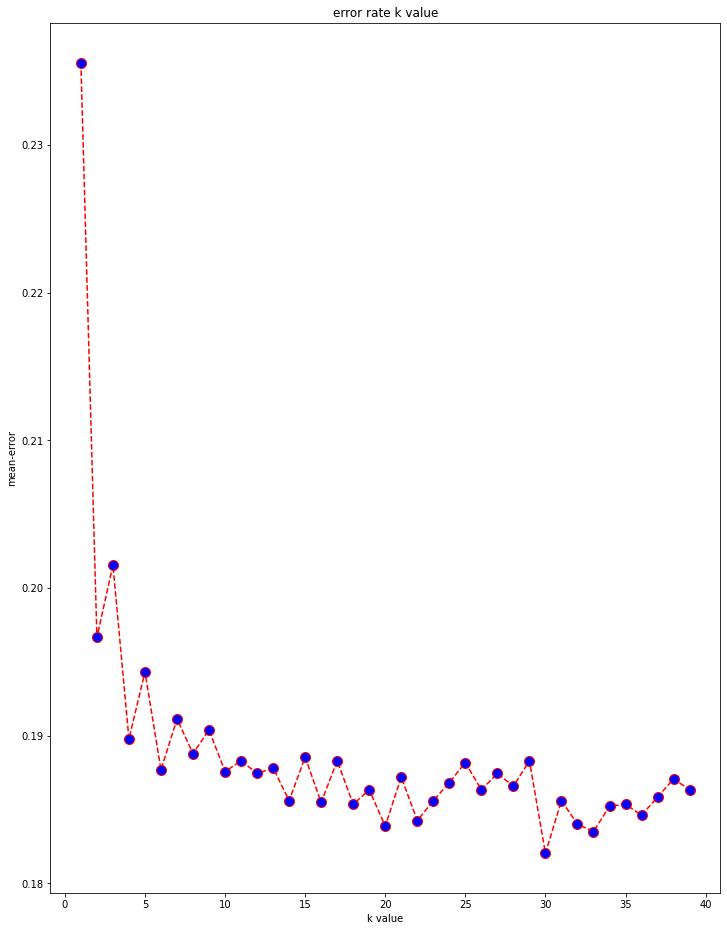

In [19]:
# finding the best k values
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  pred_i=model.predict(x_test)
  error.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(12,16))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('error rate k value')
plt.xlabel('k value')
plt.ylabel('mean-error')



In [21]:
''' in the above visulaization we can able to see the value 30 has the least mean error 
 so we use k value as 30 '''
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=30,metric='minkowski',p=2)
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=30)

In [31]:
age=int(input("enter your age:"))
education=int(input("enter your education number"))
cg=int(input("enter your capital gain"))
wh=int(input("enter the hours per week"))
new_emp= [[age,education,cg,wh]]
result=model.predict(sc.transform(new_emp))
if result==0:
  print("the person salary is lesser than 50k")
else:
  print("the person salary is higher than 50K")

enter your age:18
enter your education number14
enter your capital gain250
enter the hours per week45
the person salary is lesser than 50k


In [32]:
# predict for all datasets
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [37]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [41]:
# evaluating our data confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("accuracy is {0}%".format(accuracy_score(y_test,y_pred)*100))

[[5875  318]
 [1164  784]]
accuracy is 81.79584817589976%
